In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

from helper_functions_training import *

In [2]:
#Fetch data
lin_df = pd.read_csv('test_results//linear_model.csv')
knn_df = pd.read_csv('test_results//knn_model.csv')
rfor_df = pd.read_csv('test_results//rforest_model.csv')

#compile results into single dataframe
results_df = lin_df.drop('Index', axis=1).join(
    knn_df['KNN_Prediction']).join(
    rfor_df['RForest_Prediction'])

results_df.head(5)

,True_Price,Linear_Prediction,KNN_Prediction,RForest_Prediction
0,485000,673140.79,556936.69,557240.53
1,380000,943291.96,561911.11,763678.82
2,730000,805743.61,865625.56,1206851.52
3,325000,628381.13,415188.89,373775.08
4,250000,370065.91,259700.00,352394.98


In [3]:
##Mean price in test data
results_df['True_Price'].mean()

np.float64(367190.02539621264)

In [4]:
#Metrics
model_name = ['Linear','KNN','Random Forest']
model = results_df.columns[1:]
r2, mean_abs_error, mean_abs_pc_error = [],[],[]

for i in model:
    r2.append(round(r2_score(results_df['True_Price'], results_df[i]),3))
    mean_abs_error.append(round(mean_absolute_error(results_df['True_Price'], results_df[i]),0))
    mean_abs_pc_error.append(round(mean_absolute_percentage_error(results_df['True_Price'], results_df[i]),3))

metrics = pd.DataFrame({'model':model_name, 'r2_score':r2, 'mean_abs_error':mean_abs_error, 'mean_abs_pc_error':mean_abs_pc_error})
metrics

,model,r2_score,mean_abs_error,mean_abs_pc_error
0,Linear,0.030,172172.0,1.447
1,KNN,0.062,117391.0,0.969
2,Random Forest,0.086,139338.0,1.175


In [5]:
#No model performs especially well
#KNN prediction has better R2 and realtive errors while Random Forest has better absolute errors
#Linear model performs worse than the others by both metrics

In [6]:
#Predicted results within x percent of the true price

model = results_df.columns[1:]
pc_within_10pc, pc_within_50pc, pc_within_100pc = [],[],[]

for i in model:
    pc_within_10pc.append(results_within_limit(results_df['True_Price'], results_df[i], 0.1))
    pc_within_50pc.append(results_within_limit(results_df['True_Price'], results_df[i], 0.5))
    pc_within_100pc.append(results_within_limit(results_df['True_Price'], results_df[i], 1))

pc_accuracy = pd.DataFrame({'model':model_name, 'pc_within_10pc':pc_within_10pc, 'pc_within_50pc':pc_within_50pc, 'pc_within_100pc':pc_within_100pc})
pc_accuracy

,model,pc_within_10pc,pc_within_50pc,pc_within_100pc
0,Linear,0.151691,0.620788,0.857511
1,KNN,0.299851,0.863517,0.955914
2,Random Forest,0.238945,0.773553,0.925298


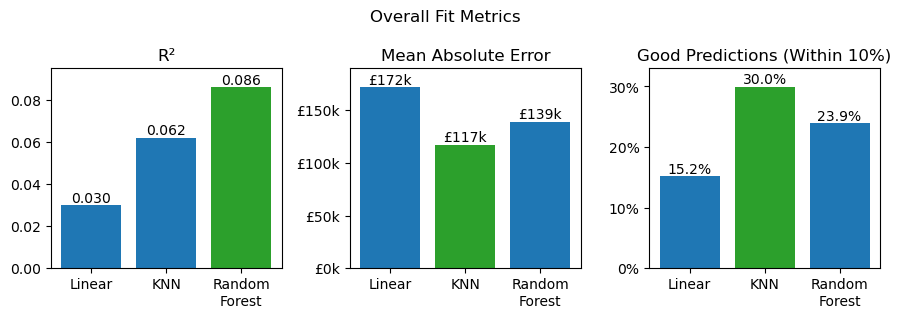

In [12]:
import matplotlib.ticker as ticker

fig, axs = plt.subplots(1,3)
fig.set_size_inches(9, 3.2)

metric_labels = ['Linear', 'KNN', 'Random\nForest']

bars0 = axs[0].bar(metric_labels, metrics['r2_score'], color=['tab:blue','tab:blue','tab:green'])
axs[0].bar_label(bars0, fmt='%.3f')
axs[0].set_ylim(0,0.095)
axs[0].set_title('R²')

bars1 = axs[1].bar(metric_labels, metrics['mean_abs_error']/1000, color=['tab:blue','tab:green','tab:blue'])
axs[1].bar_label(bars1, fmt='£%.0fk')
axs[1].yaxis.set_major_formatter(ticker.FormatStrFormatter('£%dk'))
axs[1].set_ylim(0,190)
axs[1].set_title('Mean Absolute Error')

bars2 = axs[2].bar(metric_labels, pc_accuracy['pc_within_10pc']*100, color=['tab:blue','tab:green','tab:blue'])
axs[2].bar_label(bars2, fmt='%.1f%%')
axs[2].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f%%'))
axs[2].set_ylim(0,33)
axs[2].set_yticks([0,10,20,30])
axs[2].set_title('Good Predictions (Within 10%)')

plt.suptitle('Overall Fit Metrics')
fig.tight_layout()
plt.savefig('figures//08_overall_fit.png', dpi = 600)
plt.show()

In [7]:
results_df_low_prices = results_df[results_df['True_Price']<=800000]

#Metrics
model = results_df_low_prices.columns[1:]
r2, mean_abs_error, mean_abs_pc_error = [],[],[]

for i in model:
    r2.append(round(r2_score(results_df_low_prices['True_Price'], results_df_low_prices[i]),3))
    mean_abs_error.append(round(mean_absolute_error(results_df_low_prices['True_Price'], results_df_low_prices[i]),0))
    mean_abs_pc_error.append(round(mean_absolute_percentage_error(results_df_low_prices['True_Price'], results_df_low_prices[i]),3))

metrics2 = pd.DataFrame({'model':model, 'r2_score':r2, 'mean_abs_error':mean_abs_error, 'mean_abs_pc_error':mean_abs_pc_error})
metrics2

,model,r2_score,mean_abs_error,mean_abs_pc_error
0,Linear_Prediction,-0.613,139455.0,1.505
1,KNN_Prediction,-1.610,84125.0,1.001
2,RForest_Prediction,-1.055,110756.0,1.220


In [8]:
labels = ['≤10%', '10-50%', '50-100%', '>100%']
Linear_success	= [0.151691,0.469097,0.236723,0.142489]
KNN_success	= [0.299851,0.563666,0.092397,0.044086]
RForest_success	= [0.238945,0.534608,0.151745,0.074702]

pc_success = pd.DataFrame({'labels':labels, 'Linear_model':Linear_success, 'RForest_model':RForest_success, 'KNN_model':KNN_success}).set_index('labels').transpose()
pc_success

labels,≤10%,10-50%,50-100%,>100%
Linear_model,0.151691,0.469097,0.236723,0.142489
RForest_model,0.238945,0.534608,0.151745,0.074702
KNN_model,0.299851,0.563666,0.092397,0.044086


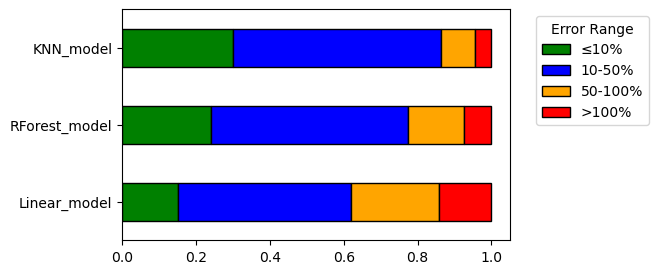

In [9]:
ax = pc_success.plot(kind='barh', stacked=True, 
                     color=['green', 'blue', 'orange', 'red'],
                     ec='black', figsize=(5, 3))
ax.legend(title='Error Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [10]:
results_df['True_Price'].quantile(0.95)

np.float64(800000.0)

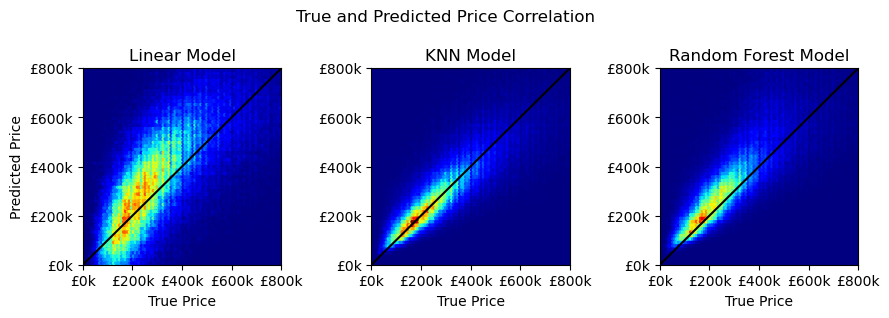

In [151]:
from matplotlib.ticker import FuncFormatter

model = results_df.columns[1:]
titles = ['Linear Model','KNN Model','Random Forest Model','Gradient Boosted Model']
scale_limit = 800000

def thousands_formatter(x, pos):
        return f'£{int(x/1000)}k'
def millions_formatter(x, pos):
        return f'£{int(x/1000000)}M'

fig, axs = plt.subplots(1,3)
fig.set_size_inches(9, 3.2)

for i in range(3):
    axs[i].hexbin(results_df['True_Price'], results_df[model[i]], 
                     cmap='jet', extent=[0, scale_limit, 0, scale_limit])
    axs[i].plot([0,scale_limit],[0,scale_limit], c='black')
    axs[i].set_xlim(0,scale_limit)
    axs[i].set_ylim(0,scale_limit)
    axs[i].set_title(titles[i])
    axs[i].xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    axs[i].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    axs[i].set_xlabel('True Price')
    axs[0].set_ylabel('Predicted Price')

plt.suptitle('True and Predicted Price Correlation')
fig.tight_layout()
plt.savefig('figures//09_hex_results.png', dpi = 600)
plt.show()

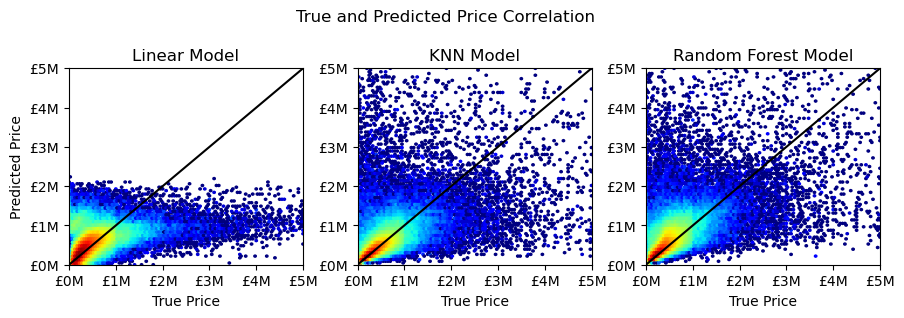

In [152]:
scale_limit_2 = 5000000

fig, axs = plt.subplots(1,3)
fig.set_size_inches(9, 3.2)

for i in range(3):
    axs[i].hexbin(results_df['True_Price'], results_df[model[i]], 
                     cmap='jet', extent=[0, scale_limit_2, 0, scale_limit_2], norm='log')
    axs[i].plot([0,scale_limit_2],[0,scale_limit_2], c='black')
    axs[i].set_xlim(0,scale_limit_2)
    axs[i].set_ylim(0,scale_limit_2)
    axs[i].xaxis.set_major_formatter(FuncFormatter(millions_formatter))
    axs[i].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('True Price')
    axs[0].set_ylabel('Predicted Price')

plt.suptitle('True and Predicted Price Correlation')
fig.tight_layout()
plt.savefig('figures//10_hex_results_longrange.png', dpi = 600)
plt.show()

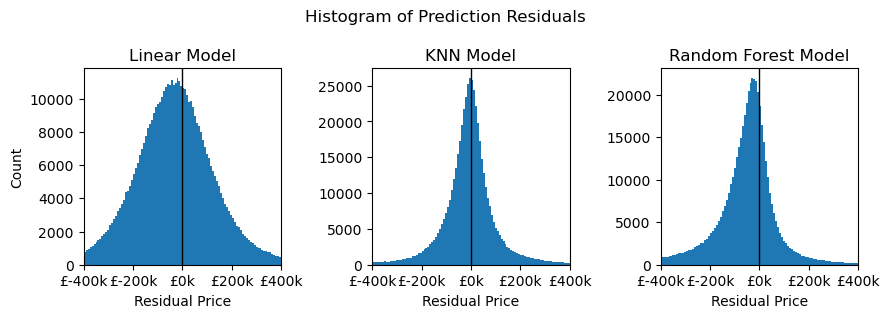

In [153]:
fig, axs = plt.subplots(1,3)
fig.set_size_inches(9, 3.2)

for i in range(3):
    residuals = results_df['True_Price']-results_df[model[i]]
    
    axs[i].hist(residuals, bins=100, range=[-scale_limit/2,scale_limit/2])
    axs[i].axvline(c='black', lw=1)
    axs[i].set_xlim(-scale_limit/2,scale_limit/2)
    axs[i].xaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    axs[i].set_title(titles[i])
    axs[i].set_xlabel('Residual Price')
    axs[0].set_ylabel('Count')

plt.suptitle('Histogram of Prediction Residuals')
fig.tight_layout()
plt.savefig('figures//11_hist_testfits.png', dpi = 600)
plt.show()

In [208]:
#Does the fit decay over time?

In [20]:
#Get the date of salefor each result
first_date = pd.to_datetime(pd.read_csv('helper_metrics//train_earliest_date.csv').iloc[0,0])
days_since_first = pd.read_csv('test_house_final.csv')['days_since_first']
dates = []

for i in days_since_first:
    dates.append(first_date + pd.DateOffset(i))

results_df_dates = results_df.copy()
results_df_dates['Date'] = dates
results_df_dates['Month'] = results_df_dates['Date'].dt.month

print('count of results by month:')
print(results_df_dates['Month'].value_counts().sort_index())

count of results by month:
Month
1      57045
2      62193
3     110709
4      30291
5      45644
6      46242
7      50730
8      52607
9      44670
10     23136
Name: count, dtype: int64


In [21]:
#Get % of good fits (<10% residual)
month_no = np.sort(results_df_dates['Month'].unique())
good_linear, good_knn, good_randomforest = [],[],[]

#Iterate over months in dataset
for i in month_no:
    #filter df by month
    month_results_df = results_df_dates[results_df_dates['Month'] == i]
    
    good_linear.append(results_within_limit(month_results_df['True_Price'], month_results_df['Linear_Prediction'], 0.1))
    good_knn.append(results_within_limit(month_results_df['True_Price'], month_results_df['KNN_Prediction'], 0.1))
    good_randomforest.append(results_within_limit(month_results_df['True_Price'], month_results_df['RForest_Prediction'], 0.1))

pd.DataFrame({'month_no':month_no, 'Linear_Model':good_linear, 'KNN_Model':good_knn, 'RandomForest_Model':good_randomforest})

,month_no,Linear_Model,KNN_Model,RandomForest_Model
0,1,0.146043,0.293961,0.230152
1,2,0.150676,0.298169,0.232068
2,3,0.158524,0.303760,0.240784
3,4,0.134231,0.279192,0.223268
4,5,0.141464,0.292371,0.235759
5,6,0.153454,0.302712,0.244388
6,7,0.152848,0.303213,0.243051
7,8,0.157108,0.304560,0.248807
8,9,0.152586,0.308328,0.242601
9,10,0.158584,0.301824,0.247752


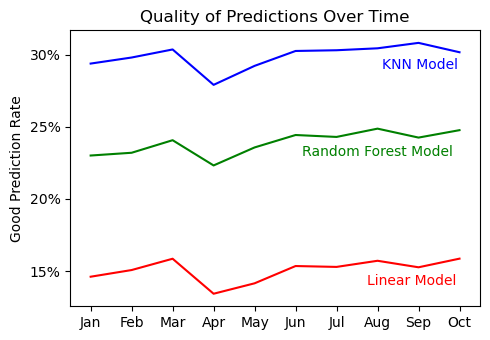

In [154]:
plt.figure(figsize=(5, 3.5))
plt.plot(month_no, np.multiply(100, good_linear), c='red')
plt.text(7.75,14,'Linear Model', c='red')
plt.plot(month_no, np.multiply(100, good_knn), c='blue')
plt.text(8.1,29,'KNN Model', c='blue')
plt.plot(month_no, np.multiply(100, good_randomforest), c='green')
plt.text(6.15,23,'Random Forest Model', c='green')


plt.xticks([i for i in range(1,11)], ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct'])
plt.yticks([15, 20, 25, 30], ['15%', '20%', '25%', '30%'])
plt.xlim(0.5,10.5)
plt.ylabel('Good Prediction Rate')
plt.title('Quality of Predictions Over Time')

plt.tight_layout()
plt.savefig('figures//12_over_time.png', dpi = 600)
plt.show()